In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

In [4]:
pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/vgsalesGlobale.csv')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/JJOO.csv')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,Muhammad Abbas,M,23.0,168.0,55.0,Pakistan,PAK,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
1,2,Jeremy Abbott,M,24.0,175.0,70.0,United States,USA,2010 Winter,2010,Winter,Vancouver,Figure Skating,Figure Skating Men's Singles,NaN
2,3,Enver Nazymovych Ablaiev,M,30.0,169.0,68.0,Ukraine,UKR,2010 Winter,2010,Winter,Vancouver,Freestyle Skiing,Freestyle Skiing Men's Aerials,NaN
3,4,Iason Abramashvili,M,21.0,176.0,82.0,Georgia,GEO,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
4,5,Iason Abramashvili,M,21.0,176.0,82.0,Georgia,GEO,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,35897,Marc Zwiebler,M,32.0,181.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,NaN
35897,35898,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
35898,35899,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN
35899,35900,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN


In [13]:
pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/application_record.csv')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


In [5]:
df_ventasglobales=pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/vgsalesGlobale.csv')
df_medallas=pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/JJOO.csv')
df_credit=pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/application_record.csv')

In [ ]:
#para mostrar los 5 primeros registros es: df_#nombre.head(5)
#para mostrar los 5 últimos registros es: df_#nombre.tail(5)
#para mostrar 5 registros aleatorios es: df_#nombre.sample(5)
#para ver el tamaño de la base se usa .shape (Filas.Columnas)
#para depuraruna base, se puede usar ".drop" seguido de lo que se quiere eliminar, esto eliminaría toda la fila
#cuando son registros que incluyen NA pero se desea mantener el resto de la información se puede utilizar el comando
#".fillna(0)" y lo sustituye por cero

## Descripción de mis Variables

In [8]:
#las variables que utilizare en el data set de vgsalesGlobales, serán:
#Genre: Genero
#Platform: Plataforma
#Global_Sales
#Publisher: estudio que lo desarrolló

#estas variables me ayudarán a ver que publicante tiene mayor ventas, en que plataforma y que generó tienen más éxito en ventas

In [13]:
df_ventasglobales [['Genre','Platform','Global_Sales','Publisher']]

,Genre,Platform,Global_Sales,Publisher
0,Sports,Wii,82.74,Nintendo
1,Platform,NES,40.24,Nintendo
2,Racing,Wii,35.82,Nintendo
3,Sports,Wii,33.00,Nintendo
4,Role-Playing,GB,31.37,Nintendo
...,...,...,...,...
16593,Platform,GBA,0.01,Kemco
16594,Shooter,GC,0.01,Infogrames
16595,Racing,PS2,0.01,Activision
16596,Puzzle,DS,0.01,7G//AMES


In [ ]:
#en mi data set queremos predecir por las varialbes de edad, peso, categoria y país, que medalla ganaría oro, plata o bronze 

In [10]:
df_medallas[['NOC','Age','Weight','Sport']]

,NOC,Age,Weight,Sport
0,PAK,23.0,55.0,Alpine Skiing
1,USA,24.0,70.0,Figure Skating
2,UKR,30.0,68.0,Freestyle Skiing
3,GEO,21.0,82.0,Alpine Skiing
4,GEO,21.0,82.0,Alpine Skiing
...,...,...,...,...
35896,GER,32.0,75.0,Badminton
35897,KAZ,23.0,62.0,Athletics
35898,KAZ,23.0,62.0,Athletics
35899,KAZ,23.0,62.0,Athletics


In [ ]:
#en el data set de aplicaciones a tarjetas de crédito, quiero ver que usuarios y variables
#son las que generan mayor ingreso por medio de AMT Income

In [7]:
df_credit[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
0,M,Y,Y,0,427500.0,Working,Higher education
1,M,Y,Y,0,427500.0,Working,Higher education
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special
...,...,...,...,...,...,...,...
438552,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special
438553,F,N,N,0,103500.0,Working,Secondary / secondary special
438554,F,N,N,0,54000.0,Commercial associate,Higher education
438555,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special


## Segunda Entrega

In [20]:
df_ventasglobales.index = df_ventasglobales['Year']


In [23]:
x=df_ventasglobales.index
y=df_ventasglobales ['Global_Sales']
y

Year
2006.0    82.74
1985.0    40.24
2008.0    35.82
2009.0    33.00
1996.0    31.37
          ...  
2002.0     0.01
2003.0     0.01
2008.0     0.01
2010.0     0.01
2003.0     0.01
Name: Global_Sales, Length: 16598, dtype: float64

Text(0.5, 1.0, 'Ventas Anuales')

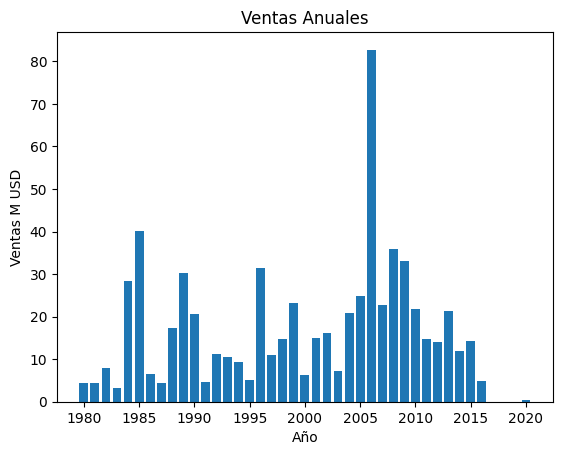

In [27]:
fig,ax=plt.subplots()
ax.bar(x,y,label='Ventas Anuales')
ax.set_xlabel('Año')
ax.set_ylabel('Ventas M USD')
ax.set_title('Ventas Anuales')